# Ankita Roy
- 23141059
- Assignment 4

In [ ]:
!pip install GEOparse scikit-learn pandas numpy

In [ ]:
# Import libraries
import GEOparse
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the dataset from GEO
# GSE6613: Parkinson's disease expression profiling
gse = GEOparse.get_GEO(geo="GSE6613", destdir="./")

10-Dec-2025 11:00:02 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
10-Dec-2025 11:00:02 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
10-Dec-2025 11:00:02 INFO GEOparse - Parsing ./GSE6613_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE6613_family.soft.gz: 
10-Dec-2025 11:00:02 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
10-Dec-2025 11:00:02 DEBUG GEOparse - SERIES: GSE6613
DEBUG:GEOparse:SERIES: GSE6613
10-Dec-2025 11:00:02 DEBUG GEOparse - PLATFORM: GPL96
DEBUG:GEOparse:PLATFORM: GPL96
10-Dec-2025 11:00:04 DEBUG GEOparse - SAMPLE: GSM153404
DEBUG:GEOparse:SAMPLE: GSM153404
10-Dec-2025 11:00:04 DEBUG GEOparse - SAMPLE: GSM153405
DEBUG:GEOparse:SAMPLE: GSM153405
10-Dec-2025 11:00:04 DEBUG GEOparse - SAMPLE: GSM153406
DEBUG:GEOparse:SAMPLE: GSM153406
10-Dec-2025 11:00:04 DEBUG GEOparse - SAMPLE: GSM153407
DEBUG:GEOparse:SAMPLE: GSM153407
1

In [ ]:
gse.phenotype_data

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_institute,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,series_id,data_row_count,characteristics_ch1.0.healthy control,characteristics_ch1.0.neurological disease control
GSM153404,Parkinson's disease sample x001,GSM153404,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,NaN
GSM153405,healthy control sample x004,GSM153405,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,,NaN
GSM153406,healthy control sample x005,GSM153406,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,,NaN
GSM153407,Parkinson's disease sample x006,GSM153407,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,NaN
GSM153408,Parkinson's disease sample x007,GSM153408,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM153504,neurological disease control sample x203,GSM153504,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,
GSM153505,Parkinson's disease sample x204,GSM153505,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,NaN
GSM153506,Parkinson's disease sample x205,GSM153506,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,NaN
GSM153507,neurological disease control sample x208,GSM153507,Public on Dec 30 2006,Dec 26 2006,Jan 11 2007,RNA,1,whole blood,Homo sapiens,9606,...,Technical University of Denmark,"Kemitorvet, Building 208",Lyngby,2800,Denmark,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM153n...,GSE6613,22283,NaN,


In [ ]:
samples = gse.pivot_samples('VALUE')

In [ ]:
samples

name,GSM153404,GSM153405,GSM153406,GSM153407,GSM153408,GSM153409,GSM153410,GSM153411,GSM153412,GSM153413,...,GSM153499,GSM153500,GSM153501,GSM153502,GSM153503,GSM153504,GSM153505,GSM153506,GSM153507,GSM153508
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,114.5,105.1,145.7,168.7,94.3,96.2,155.8,99.8,100.9,106.4,...,153.8,103.7,132.8,195.5,82.6,28.2,163.9,29.0,104.8,32.8
1053_at,64.4,58.4,52.5,45.4,51.3,50.7,42.2,6.7,44.0,55.5,...,44.0,70.5,61.9,52.2,61.2,67.6,101.9,46.8,74.9,78.1
117_at,206.3,179.8,192.0,263.6,211.9,149.5,157.3,216.6,230.5,224.1,...,268.9,48.6,193.6,132.5,165.5,146.0,291.4,246.2,251.2,210.0
121_at,507.0,497.8,346.3,430.7,485.5,437.6,424.1,678.7,434.1,592.8,...,403.6,559.1,569.7,532.8,525.7,603.9,479.7,271.9,506.1,270.4
1255_g_at,34.5,18.0,40.1,40.5,22.8,6.4,27.4,5.2,34.7,18.6,...,44.8,39.5,30.5,65.8,54.3,19.3,61.0,40.8,29.5,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Hs28SrRNA-3_at,128.7,168.0,201.4,124.0,283.1,54.8,360.9,212.6,415.5,640.7,...,638.0,1511.7,531.5,556.8,467.8,1005.1,713.9,223.5,117.1,898.9
AFFX-r2-Hs28SrRNA-5_at,138.5,103.6,122.5,58.4,129.2,25.4,158.0,35.2,146.0,132.3,...,104.1,105.7,27.0,137.9,182.9,269.3,173.9,24.9,61.4,166.6
AFFX-r2-Hs28SrRNA-M_at,85.6,108.0,111.6,47.8,132.0,26.1,106.5,53.1,98.6,120.1,...,99.1,266.3,154.5,140.4,175.0,263.9,151.4,117.9,103.7,228.6


Head of expression matrix (samples x genes):
ID_REF     1007_s_at  1053_at  117_at  121_at  1255_g_at  1294_at  1316_at  \
name                                                                         
GSM153404      114.5     64.4   206.3   507.0       34.5    135.3     75.1   
GSM153405      105.1     58.4   179.8   497.8       18.0    139.1     51.2   
GSM153406      145.7     52.5   192.0   346.3       40.1    163.8     72.0   
GSM153407      168.7     45.4   263.6   430.7       40.5    183.9     54.7   
GSM153408       94.3     51.3   211.9   485.5       22.8    138.9     83.0   

ID_REF     1320_at  1405_i_at  1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
name                                    ...                         
GSM153404      4.6      780.1      5.2  ...                2353.9   
GSM153405     13.7      492.4     24.5  ...                2489.6   
GSM153406     38.3     1121.6     36.8  ...                2498.7   
GSM153407      7.2     1436.6     34.8  ...                2985

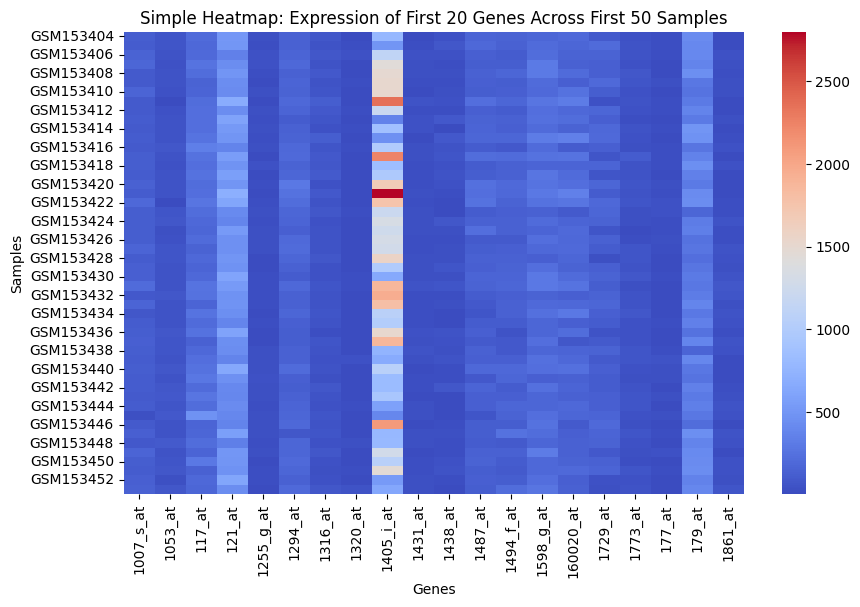


Sample phenotypes:
Control    55
PD         50
Name: count, dtype: int64
Data loaded: 105 samples, 22283 genes


In [ ]:
# Use the first platform (GPL570 for Affymetrix)
platform = list(gse.gpls.keys())[0]
# Fix: Pass the GPL object, not the key string, and specify annotation_column and gpl_on explicitly
expression_df = gse.pivot_and_annotate(values="VALUE", gpl=gse.gpls[platform], annotation_column="Gene Symbol", gpl_on="ID")

# Explicitly convert all expression values to numeric, coercing errors to NaN
expression_df = expression_df.apply(pd.to_numeric, errors='coerce')

# Handle missing values: Fill NaN values with the mean of each column
# Ensure only numeric columns are considered for mean calculation and imputation
numeric_cols = expression_df.select_dtypes(include=np.number).columns
if not numeric_cols.empty:
    expression_df[numeric_cols] = expression_df[numeric_cols].fillna(expression_df[numeric_cols].mean())

# Drop any columns that might still be all NaN (e.g., if a column was entirely non-numeric or missing)
expression_df = expression_df.dropna(axis=1, how='all')

# Transpose to have samples as rows, genes as columns (standard for PCA)
expression_matrix = expression_df.T  # Shape: (samples, genes)

# Check if expression_matrix is still empty before scaling
if expression_matrix.empty:
    raise ValueError("The expression matrix is empty after preprocessing. Cannot perform PCA.")

# Show head of the dataset
print("Head of expression matrix (samples x genes):")
print(expression_matrix.head())
# Simple Heatmap: Expression of first 20 genes across first 50 samples (for quick overview)
subset_simple = expression_matrix.iloc[:50, :20]  # First 50 samples, first 20 genes
plt.figure(figsize=(10, 6))
sns.heatmap(subset_simple, cmap='coolwarm', annot=False)
plt.title('Simple Heatmap: Expression of First 20 Genes Across First 50 Samples')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.show()

phenotypes = []
for gsm_name, gsm in gse.gsms.items():
    pheno = gsm.metadata.get('characteristics_ch1', [''])[0]  # Adjust if needed; check metadata
    # Simplify: Look for keywords
    if 'Parkinson' in pheno:
        phenotypes.append('PD')
    elif 'control' in pheno.lower() or 'healthy' in pheno.lower():
        phenotypes.append('Control')
    else:
        phenotypes.append('Other')
phenotypes = pd.Series(phenotypes, index=expression_matrix.index)
print("\nSample phenotypes:")
print(phenotypes.value_counts())

# Optional: Standardize the data (mean=0, variance=1) for better PCA
scaler = StandardScaler()
expression_matrix_scaled = scaler.fit_transform(expression_matrix)
print(f"Data loaded: {expression_matrix_scaled.shape[0]} samples, {expression_matrix_scaled.shape[1]} genes")

Number of PCs selected: 91
Explained variance ratios: [0.10068172 0.04755568 0.02994748 0.02845769 0.02742638 0.02403789
 0.02141319 0.01858569 0.01689186 0.016271   0.01604175 0.01503988
 0.01455141 0.01436387 0.01398694 0.01300141 0.01266383 0.01191062
 0.01160745 0.01118045 0.01091165 0.01068457 0.01053065 0.01010563
 0.0100452  0.00979925 0.00955311 0.00947587 0.00933556 0.00912617
 0.00890715 0.00874778 0.00867551 0.00855886 0.0084358  0.0083886
 0.00813606 0.00804642 0.00791026 0.00777048 0.00770297 0.00763143
 0.00758947 0.0074552  0.00736808 0.00729239 0.00720269 0.00713984
 0.0069871  0.00690625 0.00689786 0.00683628 0.00682769 0.00666307
 0.00662301 0.00651997 0.006469   0.00641367 0.00637865 0.00632869
 0.00622706 0.0061695  0.00613122 0.00605907 0.00596212 0.00590471
 0.00581158 0.00574346 0.00571232 0.00567127 0.00556539 0.0054834
 0.00541121 0.00534635 0.00533998 0.00527724 0.00519801 0.00513397
 0.00508201 0.00503797 0.0049842  0.004938   0.00487092 0.00480834
 0.0047435

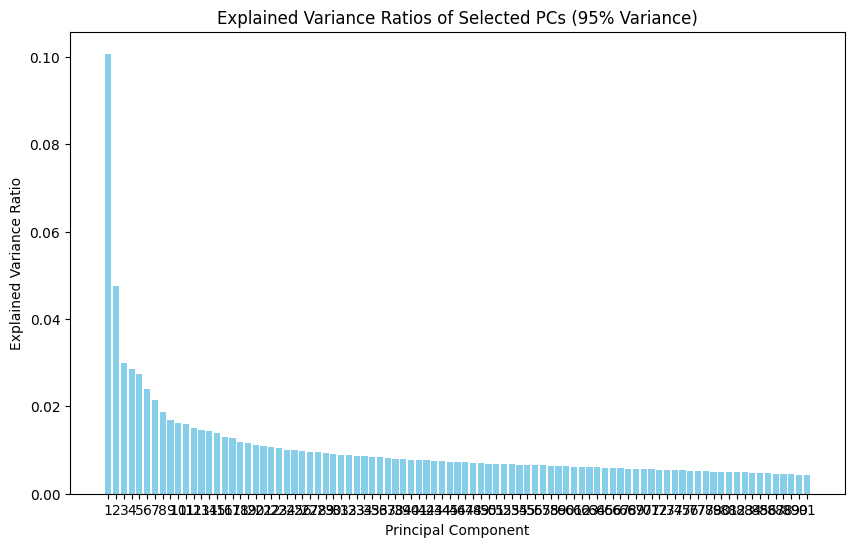


PCA with 5 components:
Explained variance ratios: [0.10068172 0.04755568 0.02994747 0.02845756 0.02742618]

PCA with 10 components:
Explained variance ratios: [0.10068172 0.04755568 0.02994748 0.02845769 0.02742635 0.0240375
 0.0214127  0.01858415 0.01687994 0.01625154]


In [ ]:
# Step 2: Run PCA with variance=0.95
pca = PCA(n_components=0.95)
pca.fit(expression_matrix_scaled)
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
print(f"Number of PCs selected: {pca.n_components_}")
print(f"Explained variance ratios: {explained_variance_ratios}")
# Bar Plot: Explained Variance Ratios of Selected PCs
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratios of Selected PCs (95% Variance)')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.show()
# ====================================================
# NEW: PCA with EXACTLY 5 components
# ====================================================
pca5 = PCA(n_components=5)
pca5.fit(expression_matrix_scaled)
loadings_5 = pca5.components_         # shape (5, n_genes)
variance_5 = pca5.explained_variance_ratio_
print("\nPCA with 5 components:")
print("Explained variance ratios:", variance_5)
# ====================================================
# NEW: PCA with EXACTLY 10 components
# ====================================================
pca10 = PCA(n_components=10)
pca10.fit(expression_matrix_scaled)
loadings_10 = pca10.components_       # shape (10, n_genes)
variance_10 = pca10.explained_variance_ratio_
print("\nPCA with 10 components:")
print("Explained variance ratios:", variance_10)



Top 20 genes (Top 5 PCs):
1. 200912_s_at: 0.0028
2. 204020_at: 0.0027
3. AFFX-r2-Ec-bioD-3_at: 0.0027
4. 200627_at: 0.0027
5. 200063_s_at: 0.0027
6. 201051_at: 0.0027
7. 221199_at: 0.0026
8. 200858_s_at: 0.0026
9. 211699_x_at: 0.0026
10. 217232_x_at: 0.0026
11. AFFX-r2-Ec-bioD-5_at: 0.0026
12. 209116_x_at: 0.0026
13. 211745_x_at: 0.0026
14. 209057_x_at: 0.0026
15. 211716_x_at: 0.0026
16. AFFX-r2-Ec-bioC-5_at: 0.0026
17. 222012_at: 0.0026
18. 209458_x_at: 0.0026
19. AFFX-BioDn-5_at: 0.0026
20. AFFX-BioC-3_at: 0.0026


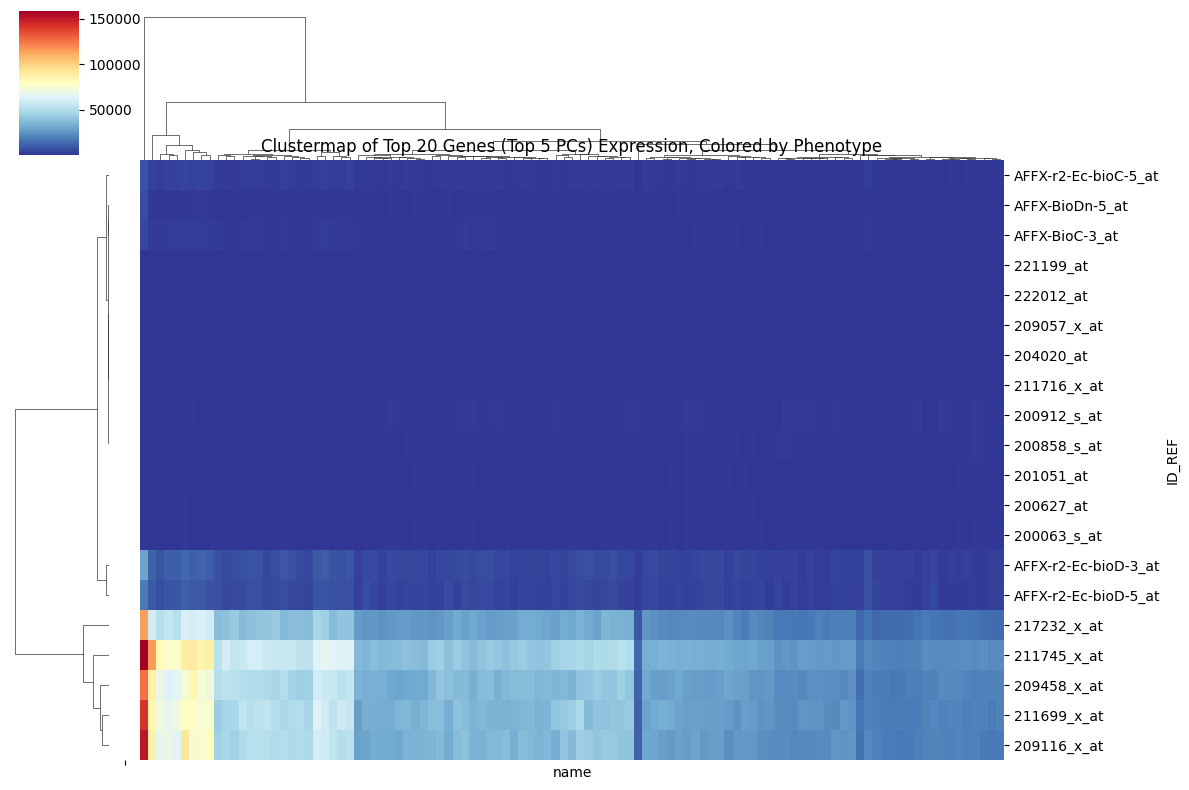

In [ ]:
# ====================================================
# Compute gene weights using TOP 5 PCs
# ====================================================

gene_weights_5 = np.zeros(expression_matrix_scaled.shape[1])

for pc in range(5):
    gene_weights_5 += np.abs(loadings_5[pc]) * variance_5[pc]

# Get gene names (probe IDs)
gene_names = expression_df.index.tolist()

# Sort genes
sorted_indices_5 = np.argsort(gene_weights_5)[::-1]
top_20_genes_5 = [gene_names[i] for i in sorted_indices_5[:20]]
top_20_weights_5 = [gene_weights_5[i] for i in sorted_indices_5[:20]]

print("\nTop 20 genes (Top 5 PCs):")
for i, (gene, weight) in enumerate(zip(top_20_genes_5, top_20_weights_5)):
    print(f"{i+1}. {gene}: {weight:.4f}")

# Clustermap: Expression of top 20 genes from top 5 PCs, colored by sample group
# Select the top 20 genes' expressions
top_20_expr_5 = expression_matrix[top_20_genes_5]

# Create a color palette for phenotypes
pheno_colors = {'PD': 'red', 'Control': 'blue', 'Other': 'green'}
row_colors = phenotypes.map(pheno_colors)

# Plot clustermap for better visualization (clusters genes and samples)
g5 = sns.clustermap(top_20_expr_5.T, row_colors=row_colors, cmap='RdYlBu_r', figsize=(12, 8),
                    xticklabels=False, yticklabels=top_20_genes_5, dendrogram_ratio=(0.1, 0.2))
g5.ax_heatmap.set_title('Clustermap of Top 20 Genes (Top 5 PCs) Expression, Colored by Phenotype')
plt.show()


Top 20 genes (Top 10 PCs):
1. 211165_x_at: 0.0033
2. 221199_at: 0.0033
3. 216410_at: 0.0032
4. 210165_at: 0.0032
5. 215733_x_at: 0.0032
6. 211448_s_at: 0.0032
7. 211915_s_at: 0.0032
8. 206428_s_at: 0.0032
9. 219652_s_at: 0.0032
10. 216926_s_at: 0.0032
11. 220006_at: 0.0032
12. 200063_s_at: 0.0032
13. 216707_at: 0.0031
14. 205613_at: 0.0031
15. 213828_x_at: 0.0031
16. 211716_x_at: 0.0031
17. 209441_at: 0.0031
18. 200006_at: 0.0031
19. 216346_at: 0.0031
20. AFFX-BioDn-5_at: 0.0031


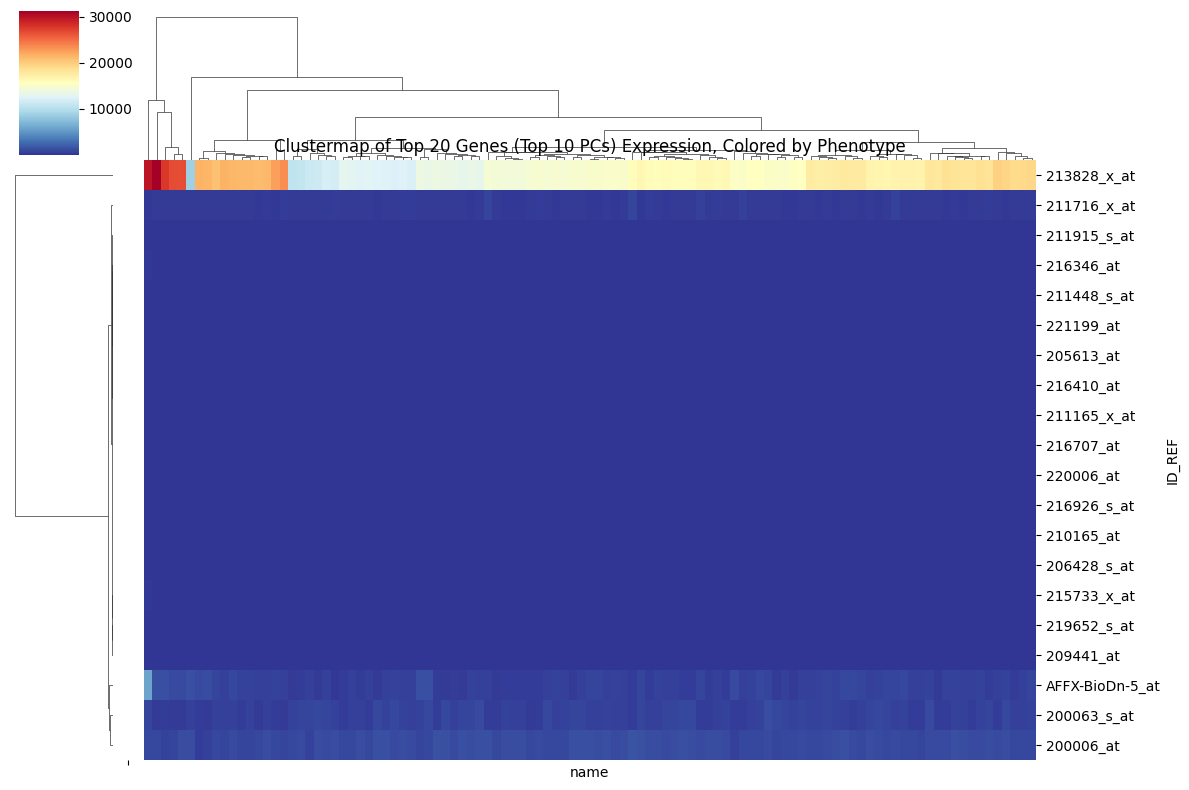

In [ ]:
# ====================================================
# Compute gene weights using TOP 10 PCs
# ====================================================

gene_weights_10 = np.zeros(expression_matrix_scaled.shape[1])

for pc in range(10):
    gene_weights_10 += np.abs(loadings_10[pc]) * variance_10[pc]

# Sort genes
sorted_indices_10 = np.argsort(gene_weights_10)[::-1]
top_20_genes_10 = [gene_names[i] for i in sorted_indices_10[:20]]
top_20_weights_10 = [gene_weights_10[i] for i in sorted_indices_10[:20]]

print("\nTop 20 genes (Top 10 PCs):")
for i, (gene, weight) in enumerate(zip(top_20_genes_10, top_20_weights_10)):
    print(f"{i+1}. {gene}: {weight:.4f}")

# Clustermap: Expression of top 20 genes from top 10 PCs, colored by sample group
# Select the top 20 genes' expressions
top_20_expr_10 = expression_matrix[top_20_genes_10]

# Plot clustermap for better visualization (clusters genes and samples)
g10 = sns.clustermap(top_20_expr_10.T, row_colors=row_colors, cmap='RdYlBu_r', figsize=(12, 8),
                     xticklabels=False, yticklabels=top_20_genes_10, dendrogram_ratio=(0.1, 0.2))
g10.ax_heatmap.set_title('Clustermap of Top 20 Genes (Top 10 PCs) Expression, Colored by Phenotype')
plt.show()

In [ ]:
# Step 5: Compare the two lists
common_genes = set(top_20_genes_5) & set(top_20_genes_10)
unique_to_5 = set(top_20_genes_5) - set(top_20_genes_10)
unique_to_10 = set(top_20_genes_10) - set(top_20_genes_5)

print(f"\nCommon genes in both lists: {len(common_genes)} - {sorted(common_genes)}")
print(f"Genes unique to top 5 PCs: {len(unique_to_5)} - {sorted(unique_to_5)}")
print(f"Genes unique to top 10 PCs: {len(unique_to_10)} - {sorted(unique_to_10)}")




Common genes in both lists: 4 - ['200063_s_at', '211716_x_at', '221199_at', 'AFFX-BioDn-5_at']
Genes unique to top 5 PCs: 16 - ['200627_at', '200858_s_at', '200912_s_at', '201051_at', '204020_at', '209057_x_at', '209116_x_at', '209458_x_at', '211699_x_at', '211745_x_at', '217232_x_at', '222012_at', 'AFFX-BioC-3_at', 'AFFX-r2-Ec-bioC-5_at', 'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at']
Genes unique to top 10 PCs: 16 - ['200006_at', '205613_at', '206428_s_at', '209441_at', '210165_at', '211165_x_at', '211448_s_at', '211915_s_at', '213828_x_at', '215733_x_at', '216346_at', '216410_at', '216707_at', '216926_s_at', '219652_s_at', '220006_at']


In [ ]:
"""
Differences between the two lists:

- The lists are not identical; only a small subset of genes (4 in this case) appear in both the top-20 lists.
- This happens because using more PCs (10 instead of 5) incorporates additional variance from lower-ranked components.
  These extra components capture more subtle patterns in the data, which can shift gene rankings.
- The top 5 PCs reflect the most dominant sources of variance in the dataset, so the genes selected from them tend to
  represent strong, broad expression patterns.
- Including the top 10 PCs introduces genes associated with weaker but still meaningful patterns, which causes new genes
  to enter the top 20 list and pushes some previous ones out.

Suitability of PCA-based gene selection:

Strengths:
- PCA identifies genes that contribute most to the overall variation in the dataset, which can help reveal biologically
  relevant global patterns (e.g., disease vs. control differences).
- Weighting genes by explained variance makes interpretation easier and ensures genes from more influential components
  are prioritized.
- Useful as an unsupervised feature selection method during exploratory analysis.

Weaknesses:
- PCA assumes linear relationships and may miss non-linear biological structure.
- It is unsupervised, so the selected genes are not guaranteed to be related to the phenotype of interest
  (e.g., Parkinson’s vs. control).
- Lower-ranked PCs may contain noise, which can add non-relevant genes to the list when more PCs are included.
- PCA does not consider differential expression directly; therefore, this method should ideally be complemented with
  supervised techniques (e.g., t-test, limma, or logistic regression).

Overall:
PCA-based gene selection is useful for exploratory feature reduction, but relying on it alone is not sufficient for
biological interpretation. It works best when combined with supervised gene selection or biological validation.
"""


'\nDifferences between the two lists:\n\n- The lists are not identical; only a small subset of genes (4 in this case) appear in both the top-20 lists.\n- This happens because using more PCs (10 instead of 5) incorporates additional variance from lower-ranked components. \n  These extra components capture more subtle patterns in the data, which can shift gene rankings.\n- The top 5 PCs reflect the most dominant sources of variance in the dataset, so the genes selected from them tend to \n  represent strong, broad expression patterns.\n- Including the top 10 PCs introduces genes associated with weaker but still meaningful patterns, which causes new genes \n  to enter the top 20 list and pushes some previous ones out.\n\nSuitability of PCA-based gene selection:\n\nStrengths:\n- PCA identifies genes that contribute most to the overall variation in the dataset, which can help reveal biologically\n  relevant global patterns (e.g., disease vs. control differences).\n- Weighting genes by expla